# **Análisis de Ventas de un E-Commerce:**

## Descifrando las Historias Detrás de los Datos

#### Nuestro proyecto se dedica a verificar las diferentes ventas de un e-commerce a lo largo de un año para descubrir las historias que estas nos pueden contar. Nos sumergiremos en el conjunto de datos de comercio electrónico del Reino Unido que ofrece regalos y artículos para el hogar, y nuestro objetivo es extraer indicadores clave que ayuden a la empresa a comprender mejor su mercado. A través de la exploración de datos, buscamos proporcionar sugerencias para estrategias de crecimiento basadas en un análisis profundo de los datos disponibles. Además, vamos a emplear técnicas de machine learning y ciencia de datos para predecir posibles futuras ventas, lo que permitirá a la empresa tomar decisiones informadas y estratégicas para su negocio en línea.

### **El conjunto de datos contiene 500 mil filas y 8 columnas.**

### La siguiente es la descripción de cada columna:

### **TransactionNo** (categórico): un número único de seis dígitos que define cada transacción. La letra "C" en el código indica una cancelación.

### **Date** (numérico): la fecha en que se generó cada transacción.

### **ProductNo** (categórico): un carácter único de cinco o seis dígitos utilizado para identificar un producto específico.

### **Product** (categórico): nombre del producto/artículo.

### **Price** (numérico): el precio de cada producto por unidad en libras esterlinas (£).

### **Quantity** (numérico): la cantidad de cada producto por transacción. Los valores negativos están relacionados con transacciones canceladas.

### **CustomerNo** (categórico): un número único de cinco dígitos que define a cada cliente.

### **Country** (categórico): nombre del país donde reside el cliente.


# ****Importar Librerias****

In [1]:
# Libreria

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.graph_objects as go 
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ****Carga de datos****

In [2]:
# Subimos dataset, lo llamamos data

data = pd.read_csv('/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv')
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
# Hacemos una copia del dataset
df = data.copy()

In [4]:
# Shape de data

df.shape

(536350, 8)


# ****Preparación y análisis de datos (EDA)****


## Preparación de Datos: Identificación y Eliminación de Registros Duplicados

#### Antes de comenzar con el análisis detallado de los datos, es crucial realizar una preparación inicial para garantizar la calidad y la integridad de nuestros datos. En esta etapa, nos centraremos en identificar y eliminar cualquier registro duplicado dentro de nuestro conjunto de datos. Es fundamental llevar a cabo esta acción para evitar distorsiones en nuestros análisis y asegurar resultados precisos. Vamos a proceder con la limpieza del dataset para garantizar una base sólida para nuestras investigaciones futuras.

In [5]:
# Valores nulos 

df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [6]:
#Resumen del dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


#### Modificamos los datos así de esta manera poder manipularlos de manera correcta.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['ProductName'] = df['ProductName'].astype(str)
df['Country'] = df['Country'].astype(str)

In [8]:
le = LabelEncoder()
df['TransactionNo'] = le.fit_transform(df['TransactionNo'])
df['ProductNo'] = le.fit_transform(df['ProductNo'])
df['Price'] = le.fit_transform(df['Price'])
df['Quantity'] = le.fit_transform(df['Quantity'])
df['CustomerNo'] = le.fit_transform(df['CustomerNo'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  int64         
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  int64         
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  int64         
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536350 non-null  int64         
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 32.7+ MB


In [10]:
#Calculamos el porcentaje de datos faltantes respecto al total de datos
valores_faltantes_rel =df.isna().sum()/df.shape[0] * 100
print(valores_faltantes_rel.sort_values(ascending = False) )

TransactionNo    0.0
Date             0.0
ProductNo        0.0
ProductName      0.0
Price            0.0
Quantity         0.0
CustomerNo       0.0
Country          0.0
dtype: float64


#### El porcentaje de valores ausentes en ninguna variable excedió el 2%, por lo que es conveniente eliminar los valores nulos.

In [11]:
## Chequeamos valores únicos en cada columna

df.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4739
Country             38
dtype: int64

In [12]:
df.duplicated(keep=False).sum()

9994

#### Observamos que hay menos registros únicos que transacciones, lo que sugiere la posibilidad de que una transacción pueda contener múltiples compras. Para confirmar esto, procedemos a revisar y eliminar los registros duplicados.

In [13]:
#Eliminamos las filas con valores faltantes
df = df.dropna(axis=0)

In [14]:
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [15]:
#Descartamos duplicados
df = df.drop_duplicates()
df.shape

(531150, 8)

In [16]:
#Obtenemos las estadísticas descriptivas básicas del datset sin datos faltantes ni duplicados
df.describe()

,TransactionNo,Date,ProductNo,Price,Quantity,CustomerNo
count,531150.000000,531150,531150.000000,531150.000000,531150.000000,531150.000000
mean,10396.807006,2019-07-04 00:23:47.393391616,1567.703052,172.983748,143.318774,2349.224569
min,0.000000,2018-12-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,5006.000000,2019-03-28 00:00:00,918.000000,88.000000,135.000000,1225.000000
50%,10650.000000,2019-07-20 00:00:00,1500.000000,143.000000,137.000000,2282.000000
75%,15623.000000,2019-10-19 00:00:00,2110.000000,248.000000,144.000000,3539.000000
max,23203.000000,2019-12-09 00:00:00,3767.000000,529.000000,509.000000,4738.000000
std,6006.870770,NaN,869.632943,115.970528,21.293928,1348.343459


## Creo columna llamada Revenue

#### Se crea esta columna para saber cuales fueron los ingresos, se genera multiplicando la columna Quantity por la columna Price

In [17]:
df['Revenue'] = df['Price'] * df['Quantity']

In [18]:
#Corroboramos que la columna fue creada
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531150 entries, 0 to 536349
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531150 non-null  int64         
 1   Date           531150 non-null  datetime64[ns]
 2   ProductNo      531150 non-null  int64         
 3   ProductName    531150 non-null  object        
 4   Price          531150 non-null  int64         
 5   Quantity       531150 non-null  int64         
 6   CustomerNo     531150 non-null  int64         
 7   Country        531150 non-null  object        
 8   Revenue        531150 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 40.5+ MB


# **Descripción de los datos a través de gráficos**

#### Al utilizar gráficos, podemos visualizar la distribución, tendencias y relaciones entre variables en nuestros datos de manera intuitiva. Esto nos ayuda a identificar patrones, detectar valores atípicos y comunicar hallazgos de manera efectiva. Los gráficos nos permiten explorar la estructura de los datos y tomar decisiones informadas sobre los próximos pasos en nuestro análisis.

# Top 20 de los productos mas vendidos

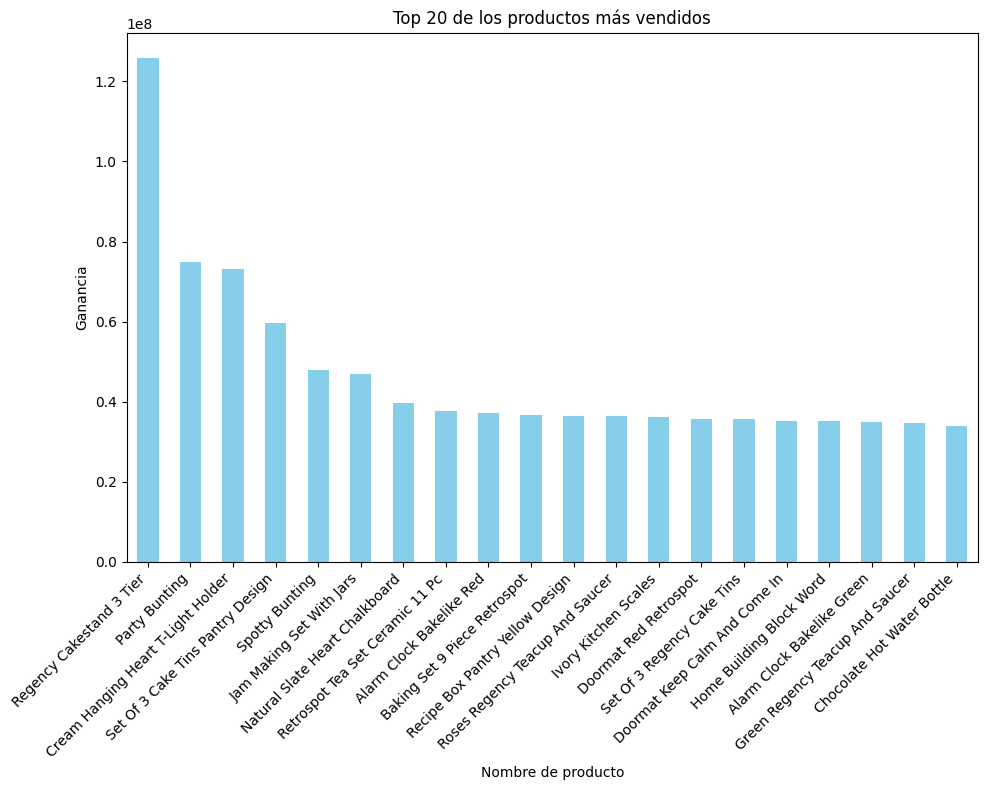

In [19]:
# Agrupar por producto y calcular la suma de las cantidades vendidas
productos_vendidos = df.groupby('ProductName')['Revenue'].sum()

# Ordenar los productos por la cantidad vendida de forma descendente
productos_vendidos_descendente = productos_vendidos.sort_values(ascending=False)

# Seleccionar los 20 productos más vendidos
mas_vendidos = productos_vendidos_descendente.head(20)

# Graficar
plt.figure(figsize=(10, 8))
mas_vendidos.plot(kind='bar', color='skyblue')
plt.title('Top 20 de los productos más vendidos')
plt.xlabel('Nombre de producto')
plt.ylabel('Ganancia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

# Top 20 de los menos vendidos

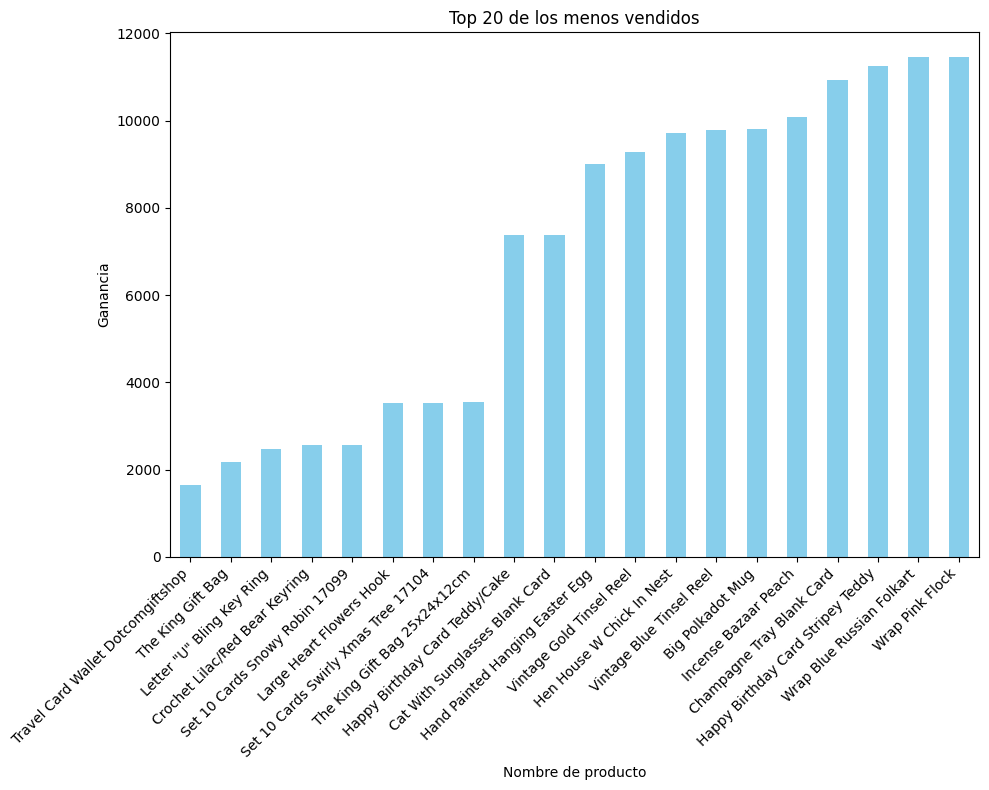

In [20]:
# Agrupar por producto y calcular la suma de las cantidades vendidas
productos_vendidos = df.groupby('ProductName')['Revenue'].sum()

# Ordenar los productos por la cantidad vendida de forma ascendente
productos_vendidos_ascendente = productos_vendidos.sort_values(ascending=True)

# Seleccionar los 20 productos menos vendidos
menos_vendidos = productos_vendidos_ascendente.head(20)

# Graficar
plt.figure(figsize=(10, 8))
menos_vendidos.plot(kind='bar', color='skyblue')
plt.title('Top 20 de los menos vendidos')
plt.xlabel('Nombre de producto')
plt.ylabel('Ganancia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

# Número de pedidos por paises

In [21]:
# Obtener el recuento de pedidos por país
countries = df['Country'].value_counts()
print(countries)

Country
United Kingdom          480005
Germany                  10656
France                   10509
EIRE                      8024
Belgium                   2539
Spain                     2426
Netherlands               2330
Switzerland               2330
Portugal                  1840
Australia                 1702
Norway                     938
Austria                    887
Iceland                    785
Finland                    692
Italy                      661
Channel Islands            629
Cyprus                     569
Unspecified                443
Sweden                     417
Denmark                    416
USA                        378
Japan                      371
Israel                     353
Singapore                  215
Poland                     174
Malta                      149
Canada                     149
Hong Kong                  149
Greece                      67
United Arab Emirates        67
European Community          58
RSA                         57


In [22]:
# Obtener las ordenes de cada país
countries = df['Country'].value_counts()


In [23]:
# Preparar el diccionario de datos
data = dict(type='choropleth', locations=countries.index, locationmode='country names', z=countries, text=countries.index, colorbar={'title': 'Order num.'})


In [24]:
# Definir el choropleth map
layout = dict(title='Total de ordenes por país', geo=dict(showframe=True, projection={'type': 'mercator'}), width=1000, height=1000)


In [25]:
# Crear mapa choropleth 
choromap = go.Figure(data=[data], layout=layout)


In [26]:
# Desplegar el mapa choropleth 
iplot(choromap, validate=False)

# Ventas por mes

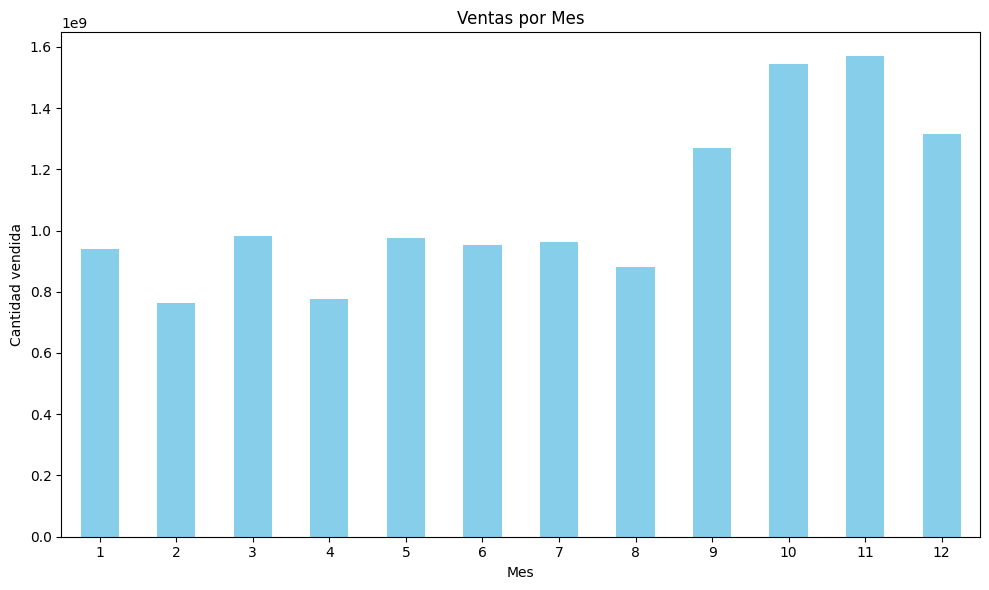

In [27]:
# Convertir la columna de fecha a tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Ventas por Mes
ventas_por_mes = df.groupby(df['Date'].dt.month)['Revenue'].sum()

# Graficar ventas por mes
plt.figure(figsize=(10, 6))
ventas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Ventas por dia de la semana

In [28]:
# Convierta el tipo de datos de la columna 'Fecha' a fecha y hora
dateFormat = '%m/%d/%Y'  # Define the date format present in the 'Date' column
df['Date'] = pd.to_datetime(df['Date'], format=dateFormat)  # Convert 'Date' column to datetime
df['Date'].info()  # Display information about the 'Date' column after conversion

<class 'pandas.core.series.Series'>
Index: 531150 entries, 0 to 536349
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
531150 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.1 MB


In [29]:
# Function to downcast numeric columns to save memory
def downcast_dtypes(df):
    # Select columns with float64 and int64 data types
    float_cols = [c for c in df.columns if df[c].dtype == "float64"]
    int_cols = [c for c in df.columns if df[c].dtype == "int64"]
    
    # Convert float64 columns to float32 and int64 columns to int16 for memory optimization
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    
    return df

# Apply the downcast_dtypes function to the DataFrame
df = downcast_dtypes(df)

# Display updated DataFrame information to confirm datatype modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531150 entries, 0 to 536349
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531150 non-null  int16         
 1   Date           531150 non-null  datetime64[ns]
 2   ProductNo      531150 non-null  int16         
 3   ProductName    531150 non-null  object        
 4   Price          531150 non-null  int16         
 5   Quantity       531150 non-null  int16         
 6   CustomerNo     531150 non-null  int16         
 7   Country        531150 non-null  object        
 8   Revenue        531150 non-null  int16         
dtypes: datetime64[ns](1), int16(6), object(2)
memory usage: 22.3+ MB


In [30]:
# Create a new calculated column 'Day' extracting the day from the 'Date' column
df["Day"] = df["Date"].dt.day

# Create a new calculated column 'Month' extracting the month from the 'Date' column
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Create a new calculated column 'Year' extracting the year from the 'Date' column
df['Year'] = pd.DatetimeIndex(df['Date']).year

# Display the updated DataFrame showing the new columns
df.head()



,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Day,Month,Year
0,19753,2019-12-09,1356,Set Of 2 Wooden Market Crates,418,146,4123,United Kingdom,-4508,9,12,2019
1,19746,2019-12-09,1461,Christmas Star Wish List Chalkboard,70,170,657,United Kingdom,11900,9,12,2019
2,19746,2019-12-09,2076,Storage Tin Vintage Leaf,122,146,657,United Kingdom,17812,9,12,2019
3,19746,2019-12-09,2105,Tree T-Light Holder Willie Winkie,70,146,657,United Kingdom,10220,9,12,2019
4,19746,2019-12-09,2080,Set Of 4 Knick Knack Tins Poppies,143,140,657,United Kingdom,20020,9,12,2019


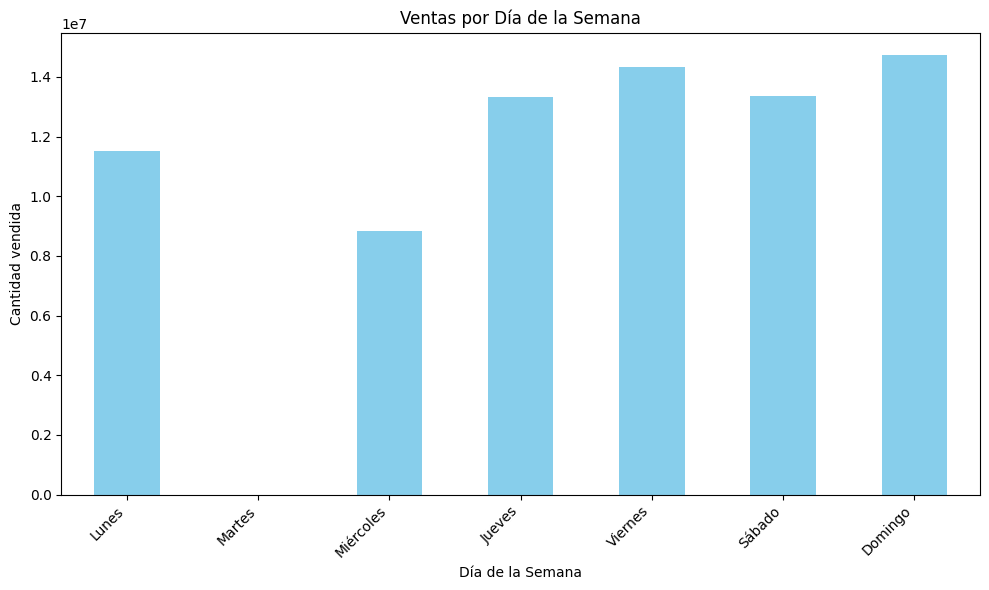

In [31]:
# Convertir la columna de fecha a tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Crear un DataFrame con todos los días de la semana
todos_los_dias = pd.DataFrame(index=pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D'))

# Contar las ventas por día
ventas_por_dia = df.groupby(df['Date'].dt.date)['Quantity'].sum()

# Llenar los días sin ventas con ceros
todos_los_dias['Quantity'] = ventas_por_dia
todos_los_dias.fillna(0, inplace=True)

# Ventas por Día de la Semana
ventas_por_dia_semana = todos_los_dias.groupby(todos_los_dias.index.dayofweek)['Quantity'].sum()

# Crear un índice para los días de la semana
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Asignar el nuevo índice a las ventas por día de la semana
ventas_por_dia_semana.index = dias_semana

# Graficar ventas por día de la semana
plt.figure(figsize=(10, 6))
ventas_por_dia_semana.plot(kind='bar', color='skyblue')
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Convertir la columna de fecha a tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los datos para el martes
ventas_martes = df[df['Date'].dt.dayofweek == 1]  # El martes tiene el índice 1 en Python (lunes es 0)

# Calcular las ventas para el martes
ventas_totales_martes = ventas_martes['Quantity'].sum()

print("Ventas totales el martes:", ventas_totales_martes)

Ventas totales el martes: 0


La ausencia de ventas los días martes en el ecommerce puede atribuirse a una variedad de factores. Es posible que los clientes tengan patrones de compra específicos y prefieran hacer compras en otros días de la semana. Además, los martes suelen ser días laborables en muchas regiones, lo que puede significar que las personas estén ocupadas con sus actividades laborales y tengan menos tiempo para dedicar a las compras en línea. También es posible que sea el día de descanso de los empleados o se realice el cierre de ventas semanal. De todas maneras para lograr mejores resultados será necesario que las estrategias de marketing y promoción estén enfocadas en los días martes, lo que podría influir en la cantidad de ventas generadas. Considerar estos factores ayudará a ajustar las estrategias y maximizar las ventas en todos los días de la semana.

In [33]:
# Definir un diccionario con los nombres de los meses
month_names = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Setiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre"
}

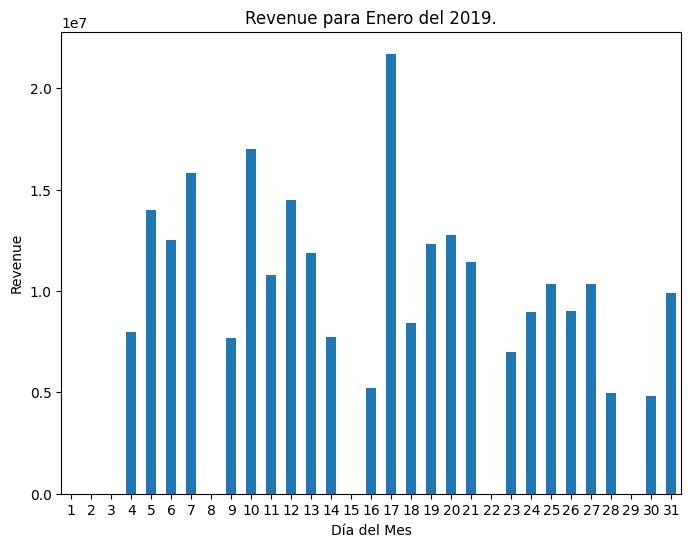

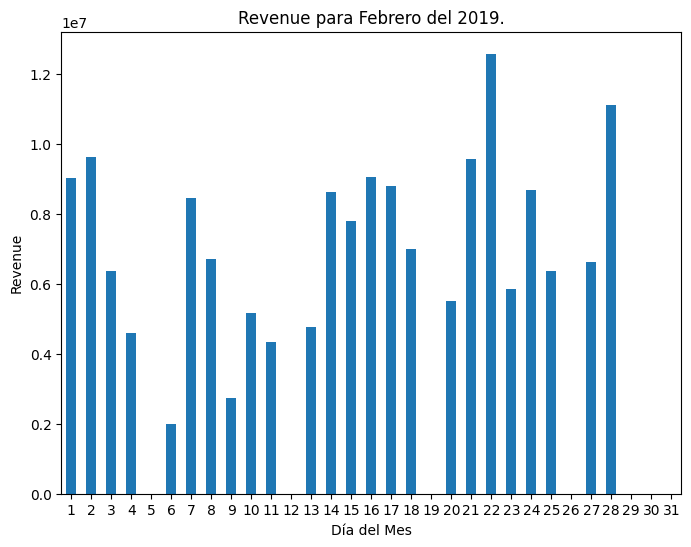

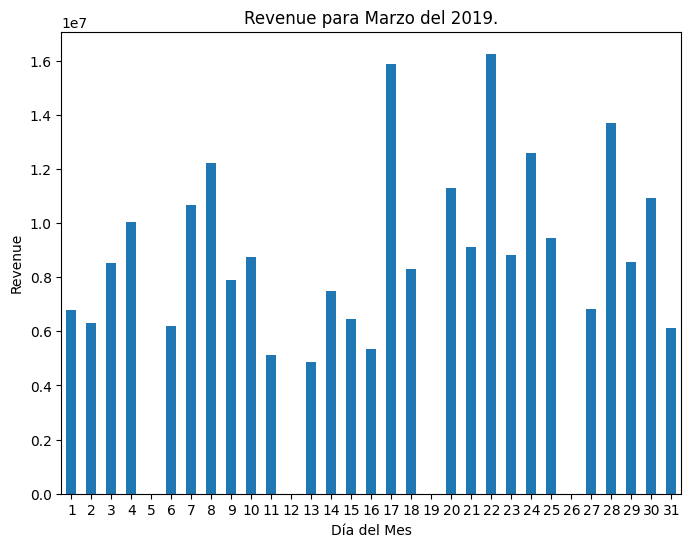

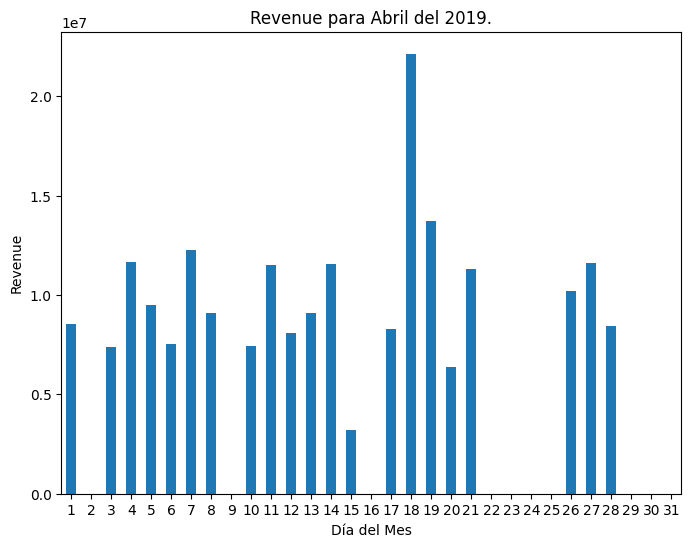

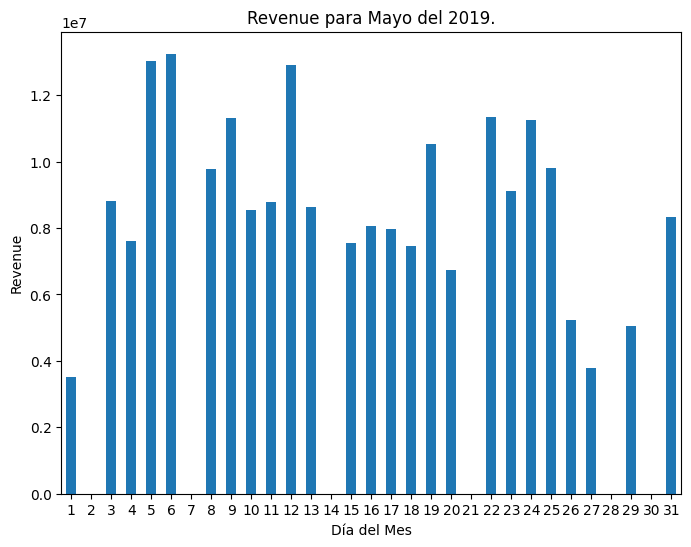

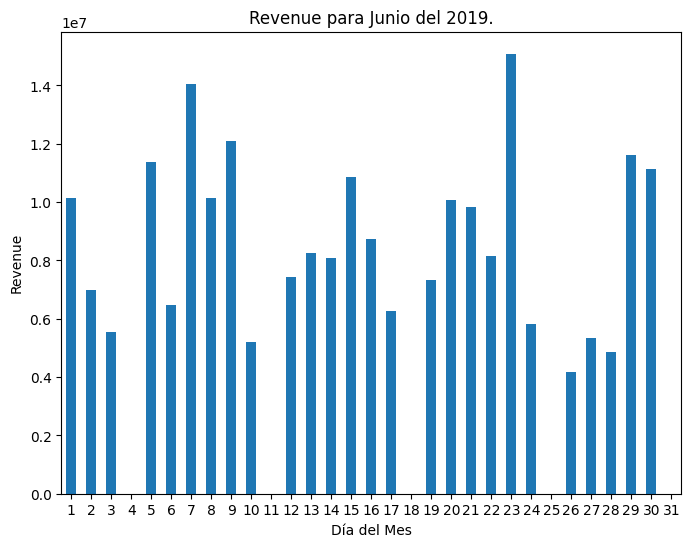

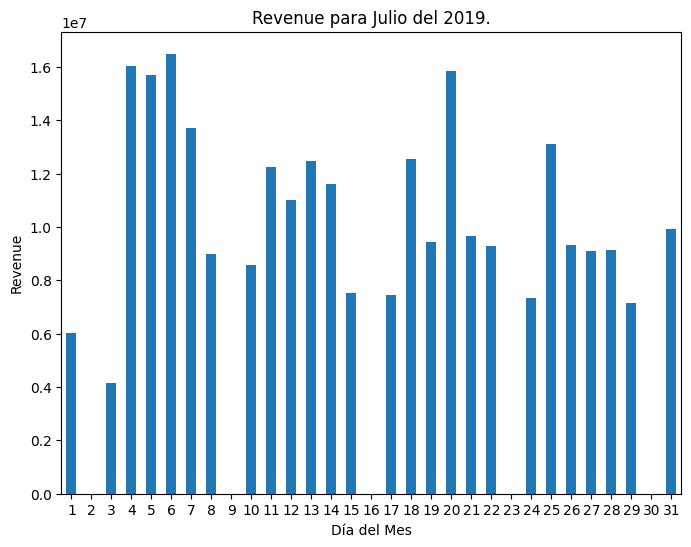

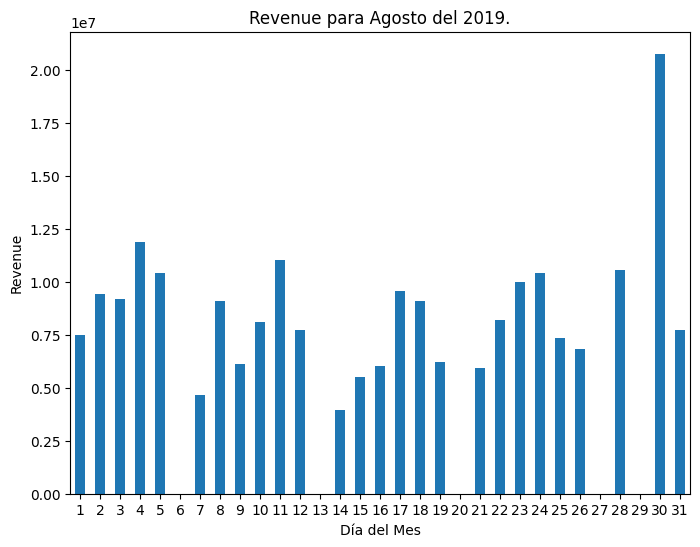

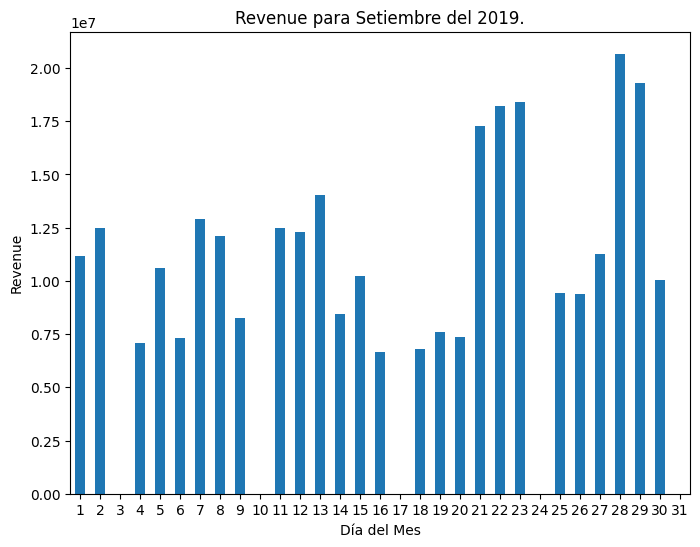

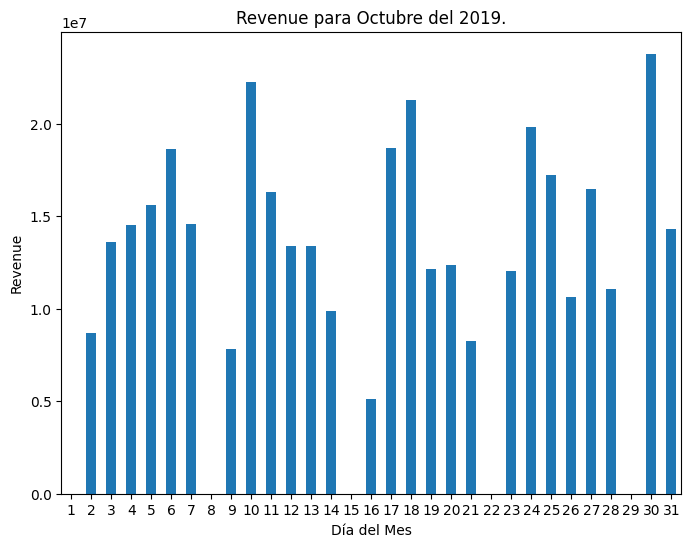

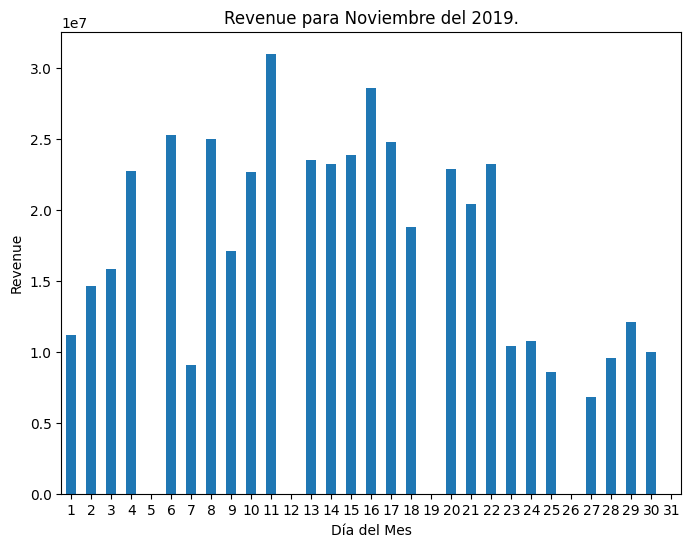

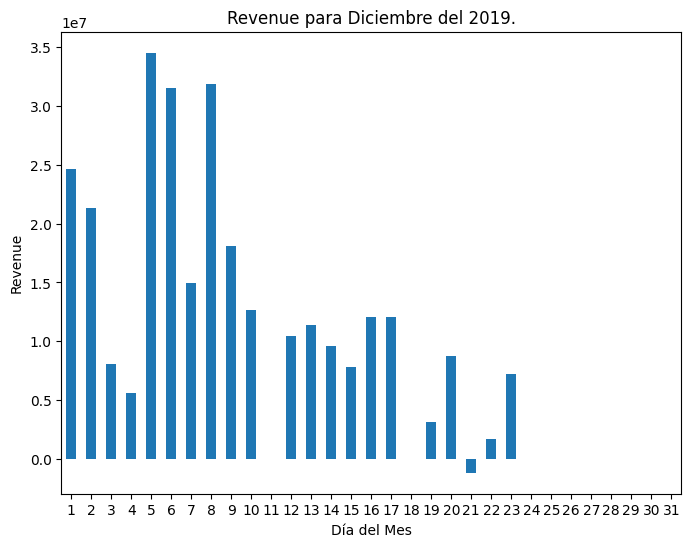

In [34]:
# Crear un DataFrame con la revenue diaria por mes
daily_revenue = df.groupby(by=["Month", "Day"]).agg({"Revenue": "sum"})

# Iterar sobre cada mes y crear un gráfico de barras
for month, data in daily_revenue.unstack().iterrows():
    fig, ax = plt.subplots(figsize=[8, 6])  # Crear una nueva figura para cada mes
    month_name = month_names[month]  # Suponiendo que 'month_names' está definido
    data.plot.bar(ax=ax, title=f"Revenue para {month_name} del 2019.", rot=0)
    ax.set_xticklabels(range(1, 32))  # Establecer las etiquetas del eje x de 1 a 31
    ax.set_xlabel("Día del Mes")
    ax.set_ylabel("Revenue")
    plt.show()  # Mostrar la figura para el mes actual


En estos gráficos se puede observar la particularidad que veíamos antes, no hubieron ventas los días martes. Esto es una observación muy importante para futuras estrategias de ventas.

In [35]:
# Transformamos la variable Country para crear una variable categórica
df['Country'] = le.fit_transform(df['Country'])

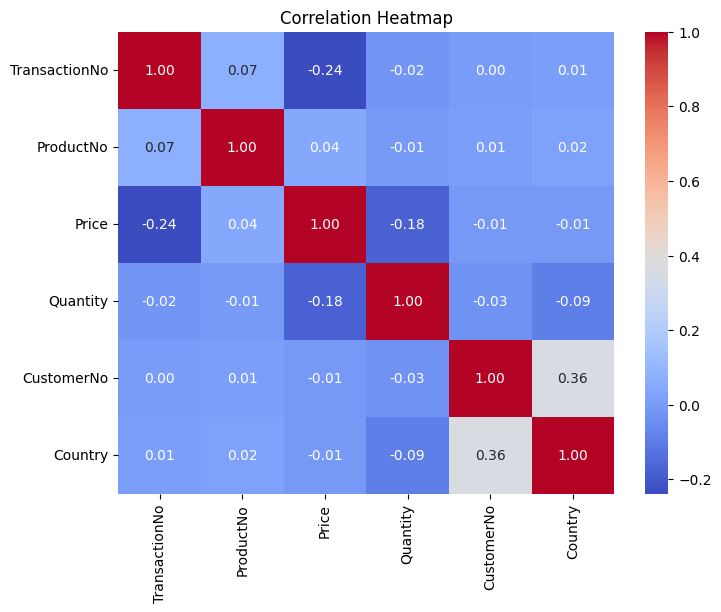

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación

correlation_matrix = df[['TransactionNo', 'ProductNo', 'Price', 'Quantity','CustomerNo','Country']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Modelado de datos**

# Selección de atributos

#### En esta parte del código se seleccionan solo las columnas se usarán en los modelos para la toma de decisiones.

In [37]:
selected_features = df.loc[:, ["Day","Month", "Year", "ProductNo", "Price", "Quantity", "Country"]]

# Muestra las primeras filas para verificar
print(selected_features.head(20))

    Day  Month  Year  ProductNo  Price  Quantity  Country
0     9     12  2019       1356    418       146       36
1     9     12  2019       1461     70       170       36
2     9     12  2019       2076    122       146       36
3     9     12  2019       2105     70       146       36
4     9     12  2019       2080    143       140       36
5     9     12  2019        739     70       158       36
6     9     12  2019       1026    122       152       36
7     9     12  2019       1027    163       146       36
8     9     12  2019       1115     70       146       36
9     9     12  2019       1114     61       158       36
10    9     12  2019       1261     94       154       36
11    9     12  2019       1317    163       146       36
12    9     12  2019       1525     94       154       36
13    9     12  2019       1582    163       146       36
14    9     12  2019       1584    122       146       36
15    9     12  2019       1645    122       146       36
16    9     12

# ****Data split****

#### El Data Split consiste en dividir el conjunto de datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se reserva para evaluar su rendimiento. Esto es crucial para evitar el sobreajuste del modelo y garantizar que pueda generalizar correctamente a nuevos datos.

Tomamos la columna Revenue como valor target en el modelo 

In [38]:
# 'selected_features' es el DataFrame con las características seleccionadas
# y 'target' es la variable objetivo que deseamos predecir, 'Revenue'

# Separa las características (X) y la variable objetivo (y)
X = selected_features
y = df['Revenue']  # Ajusta esto según el nombre real de tu variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora tendrás cuatro conjuntos de datos: X_train, X_test, y_train, y y_test
# X_train y y_train son los datos de entrenamiento, X_test y y_test son los datos de prueba
# test_size=0.2 indica que el 20% de los datos se utilizarán como conjunto de prueba
# random_state=42 es una semilla aleatoria para garantizar reproducibilidad

# **Estandarización**

In [39]:
# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el scaler a los datos de  entrenamiento y transforma los datos
X_train_scaled = scaler.fit_transform(X_train)

# Transforma también los datos de prueba utilizando el mismo scaler ajustado
X_test_scaled = scaler.transform(X_test)

# **Modelo de Regresión lineal**

In [40]:
# Crea un objeto de regresión lineal
model = LinearRegression()

# Entrena el modelo usando el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

# **Evalúa el modelo**

In [41]:
# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcula el error cuadrático medio (MSE) para evaluar el modelo
val_accuracy = model.score(X_train, y_train)
print('Exactitud en validación ', np.round(val_accuracy*100, 2), '%')

test_accuracy = model.score(X_test, y_test) # TODO - Evaluamos modelo en test
print('Exactitud en test ', np.round(test_accuracy*100, 2), '%')

Exactitud en validación  22.16 %
Exactitud en test  22.23 %


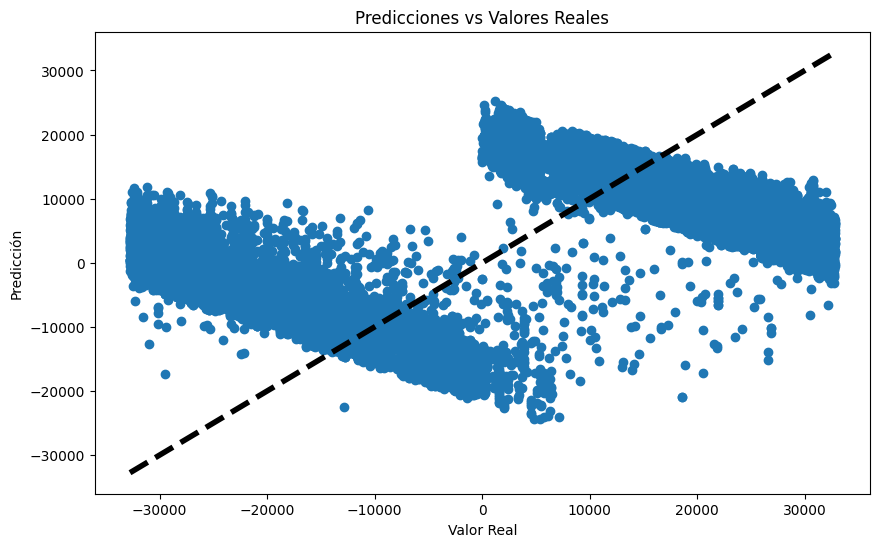

In [42]:
import matplotlib.pyplot as plt

# Graficar las predicciones versus los valores reales en los datos de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.show()

# **Modelo Random Forest**

In [43]:
# Inicializa el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred_rf = rf_model.predict(X_test)


# Definir una función para calcular la exactitud en un cierto umbral de diferencia
def accuracy_within_threshold(y_true, y_pred, threshold):
    accuracy = np.mean(np.abs(y_true - y_pred) < threshold)
    return accuracy

# Definir umbral para la exactitud
threshold = 100  # Por ejemplo, una diferencia absoluta menor que 100

# Calcular la exactitud en el conjunto de validación
val_accuracy = accuracy_within_threshold(y_train, rf_model.predict(X_train), threshold)
print('Exactitud en validación:', np.round(val_accuracy*100, 2), '%')

# Calcular la exactitud en el conjunto de test
test_accuracy = accuracy_within_threshold(y_test, y_pred_rf, threshold)
print('Exactitud en test:', np.round(test_accuracy*100, 2), '%')

Exactitud en validación: 99.49 %
Exactitud en test: 99.03 %


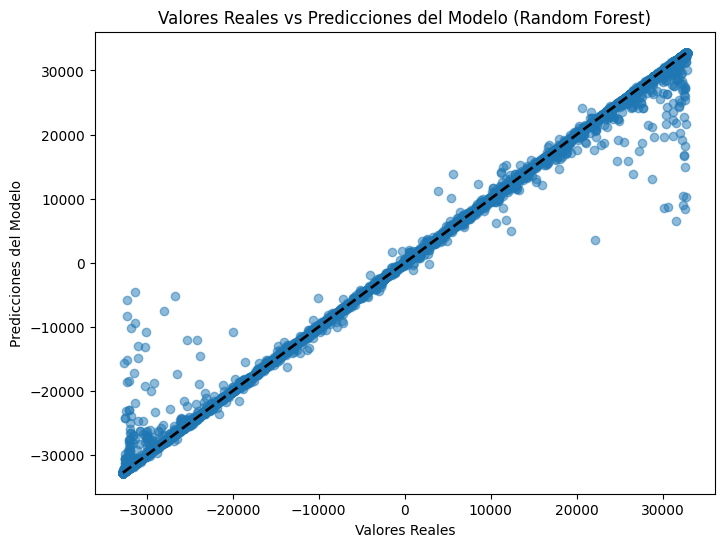

In [47]:
# Ajustar el modelo a todos los datos
rf_model.fit(X, y)

# Realizar predicciones en todos los datos
predicciones = rf_model.predict(X)

# Graficar valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y, predicciones, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea de referencia 1:1
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Valores Reales vs Predicciones del Modelo (Random Forest)')
plt.show()

#### Ambos modelos están evaluados utilizando el error cuadrático medio (MSE). Los resultados indican que el modelo de Random Forest tiene un rendimiento mucho mejor que el modelo de regresión lineal, como se evidencia por la alta exactitud en validación y en test.

#### Además, se ha calculado la exactitud dentro de un cierto umbral de diferencia (en este caso, menos de 100), tanto para el conjunto de validación como para el conjunto de test, lo que indica que la mayoría de las predicciones caen dentro de este umbral de diferencia para ambos modelos.

#### En general, parece que el modelo de Random Forest es más adecuado para el conjunto de datos dado, ya que muestra un rendimiento mucho mejor en comparación con el modelo de regresión lineal.

# **Cross-Validation**

In [45]:
# Inicializa el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Realiza la validación cruzada con 5 pliegues
scores_rf = cross_val_score(model_rf, X, y, cv=5)

# Muestra los resultados de la validación cruzada
print("Puntuaciones de validación cruzada (Random Forest):", scores_rf)
print("Puntuación media de validación cruzada (Random Forest):", np.mean(scores_rf))

Puntuaciones de validación cruzada (Random Forest): [0.99887329 0.99920204 0.99912991 0.99933383 0.98982354]
Puntuación media de validación cruzada (Random Forest): 0.997272521716895


#### Esto indica que el modelo de Random Forest tiene un rendimiento muy consistente en los diferentes pliegues, con puntuaciones de validación cruzada cercanas a 1 en la mayoría de los casos. La puntuación media de validación cruzada, que es el promedio de estas puntuaciones individuales, es de aproximadamente 0.9973, lo que sugiere un rendimiento muy alto en general.

#### Estos resultados son bastante prometedores y sugieren que el modelo de Random Forest es capaz de generalizar bien para datos no vistos, lo que lo hace una buena opción para este conjunto de datos.

#  EVALUAR RANDOM FOREST

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print('Error Absoluto Medio (MAE):', mae)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, y_pred_rf)
print('Error Cuadrado Medio (MSE):', mse)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred_rf)
print('Coeficiente de Determinación (R^2):', r2)

Error Absoluto Medio (MAE): 12.871579309046407
Error Cuadrado Medio (MSE): 222818.68118898894
Coeficiente de Determinación (R^2): 0.9993591438626991


# Métricas de Evaluación del Modelo Random Forest

#### En el contexto de un modelo de regresión, se utilizan varias métricas para evaluar su rendimiento. Aquí se presentan tres de las métricas más comunes:

## Error Absoluto Medio (MAE)

#### El Error Absoluto Medio (MAE) mide el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. En este caso, el MAE es de aproximadamente 12.87. Un MAE bajo indica que las predicciones del modelo tienden a ser cercanas a los valores reales.

## Error Cuadrado Medio (MSE)

#### El Error Cuadrado Medio (MSE) calcula el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales. Aquí, el MSE es de aproximadamente 222818.68. Un MSE bajo indica que las predicciones del modelo son en general muy cercanas a los valores reales.

## Coeficiente de Determinación (R^2)

#### El Coeficiente de Determinación (R^2) es una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales. Puede variar de 0 a 1, donde 1 indica un ajuste perfecto. En este caso, el R^2 es de aproximadamente 0.9994, lo que sugiere que el modelo explica aproximadamente el 99.94% de la variabilidad en los datos de prueba.

#### En resumen, un MAE y un MSE bajos indican que el modelo está haciendo predicciones precisas, mientras que un R^2 alto sugiere un buen ajuste del modelo a los datos.

# **Conclusión**

### Nuestro modelo de Machine Learning es una herramienta poderosa que puede ayudar a las empresas a tomar mejores decisiones, optimizar sus operaciones y maximizar sus ganancias. La precisión del 99% del modelo demuestra su capacidad excepcional para predecir los ingresos futuros, lo que lo convierte en una herramienta invaluable para cualquier empresa que quiera tener éxito en el mercado actual.
### Con una base de datos sólida se puede obtener resultados para todo tipo de emprendimiento y con esto tomar decisiones que abandonen la subjetividad y sean corroboradas la información que nos da la empresa. 

